In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [183]:
from pymongo import MongoClient
from datetime import datetime
client = MongoClient('52.79.241.214', 27017)
print("DB connection complete!!")
DB_Coin = client["Coin-USD"] 

DB connection complete!!


In [246]:
Collection = DB_Coin['BTC']
import time
DB_schema = []
i = 0

for collect in Collection.find():
    #if i==2902:
    if i==502:
        continue
    temp_record = {}
    temp_record['open'] = collect['Open']
    temp_record['close'] = collect['Price']
    temp_record['high'] = collect['High']
    temp_record['low'] = collect['Low']
    temp_record['volume'] = collect['Volume']    
    temp_record['Date'] = collect['Date']
    DB_schema.append(temp_record)
    del temp_record
    i = i+1
print(DB_schema)
first_date=DB_schema[0]['Date']
print(first_date)
first_date=str(first_date)
last_date=DB_schema[-1]['Date']
print(last_date)
last_date=str(last_date)

[{'open': 6943.6, 'close': 6952.3, 'low': 6914.8, 'high': 6991.6, 'volume': 157830.0, 'Date': 20180807}, {'open': 7027.8, 'close': 6943.6, 'low': 6852.5, 'high': 7143.6, 'volume': 168870.0, 'Date': 20180806}, {'open': 7014.0, 'close': 7027.1, 'low': 6887.9, 'high': 7087.6, 'volume': 177640.0, 'Date': 20180805}, {'open': 7418.9, 'close': 7014.3, 'low': 6949.7, 'high': 7484.2, 'volume': 222570.0, 'Date': 20180804}, {'open': 7535.6, 'close': 7419.0, 'low': 7293.5, 'high': 7535.6, 'volume': 226460.0, 'Date': 20180803}, {'open': 7606.4, 'close': 7535.6, 'low': 7470.6, 'high': 7701.4, 'volume': 216340.0, 'Date': 20180802}, {'open': 7728.5, 'close': 7606.4, 'low': 7449.2, 'high': 7753.2, 'volume': 237690.0, 'Date': 20180801}, {'open': 8176.4, 'close': 7729.4, 'low': 7649.8, 'high': 8176.5, 'volume': 266940.0, 'Date': 20180731}, {'open': 8214.7, 'close': 8177.1, 'low': 7874.4, 'high': 8262.0, 'volume': 242210.0, 'Date': 20180730}, {'open': 8231.5, 'close': 8215.6, 'low': 8113.3, 'high': 8275.4

In [254]:
import pandas as pd
hash_rate=pd.read_csv('D:/export-NetworkHash.csv',header=None)
hash_rate=hash_rate.shift(-1)
hash_rate_from=hash_rate[(hash_rate[0]=='20170324')]
hash_rate_to=hash_rate[(hash_rate[0]=='20180808')]
hash_rate_from_index=hash_rate_from.index[0]
hash_rate_to_index=hash_rate_to.index[0]
hash_rate=hash_rate.iloc[hash_rate_from_index:hash_rate_to_index,0:2]
print(hash_rate)
hash_rate=hash_rate[1]
hash_rate=hash_rate.sort_index(ascending=False)      ## according to the order of from 20180808 to 20170324
hash_rate=list(hash_rate)

             0            1
603   20170324   15334.1063
604   20170325   15439.4585
605   20170326   16219.4936
606   20170327   16894.3097
607   20170328    16458.957
608   20170329    17141.823
609   20170330   17183.9723
610   20170331   17643.5302
611   20170401   17342.0731
612   20170402   17320.8014
613   20170403   16564.8723
614   20170404   17593.0096
615   20170405   18094.6996
616   20170406   17967.3505
617   20170407   18253.0325
618   20170408   18340.2159
619   20170409   18009.4232
620   20170410   18072.1973
621   20170411   18671.3934
622   20170412   18555.8787
623   20170413    18205.074
624   20170414    19833.812
625   20170415   19260.1407
626   20170416   19591.7831
627   20170417   19889.9768
628   20170418   20302.3049
629   20170419   20078.8856
630   20170420   20288.8866
631   20170421   20805.2888
632   20170422    20900.958
...        ...          ...
1075  20180709  292711.4538
1076  20180710  285475.5765
1077  20180711  277618.9439
1078  20180712  2807

### issue

              Date   close    high     low    open    volume
Date                                                        
20180807  20180807  6952.3  6991.6  6914.8  6943.6  157830.0
20180806  20180806  6943.6  7143.6  6852.5  7027.8  168870.0
20180805  20180805  7027.1  7087.6  6887.9  7014.0  177640.0
20180804  20180804  7014.3  7484.2  6949.7  7418.9  222570.0
20180803  20180803  7419.0  7535.6  7293.5  7535.6  226460.0
20180802  20180802  7535.6  7701.4  7470.6  7606.4  216340.0
20180801  20180801  7606.4  7753.2  7449.2  7728.5  237690.0
20180731  20180731  7729.4  8176.5  7649.8  8176.4  266940.0
20180730  20180730  8177.1  8262.0  7874.4  8214.7  242210.0
20180729  20180729  8215.6  8275.4  8113.3  8231.5  155240.0
20180728  20180728  8234.1  8234.1  8077.4  8186.8  147140.0
20180727  20180727  8187.4  8273.8  7808.3  7936.9  243220.0
20180726  20180726  7937.0  8304.3  7861.0  8173.9  235450.0
20180725  20180725  8173.7  8484.6  8062.1  8404.9  269230.0
20180724  20180724  8407

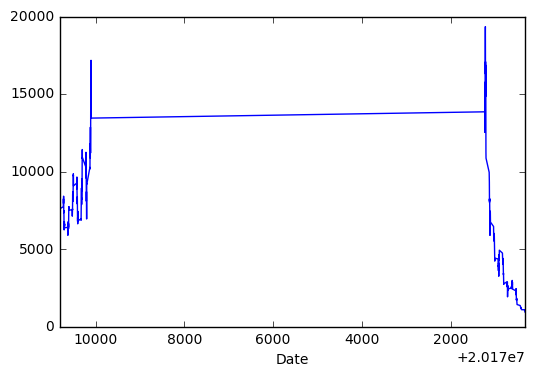

In [255]:
%matplotlib inline
import pandas as pd
DF = pd.DataFrame(DB_schema)
DF.index = DF['Date']
print(DF)
DF['close'].plot()
print(hash_rate)
DF.loc[:,'hash_rate']=hash_rate
print(DF)

In [256]:
DF.values.shape

(502, 7)

In [257]:
target_names = ['close']
shift_hours = 2
DF_targets = DF[target_names].shift(-shift_hours)

In [258]:
DF = DF[['close', 'high', 'low', 'open', 'volume','hash_rate']]
DF.head()

,close,high,low,open,volume,hash_rate
Date,,,,,,
20180807,6952.3,6991.6,6914.8,6943.6,157830.0,291954.5748
20180806,6943.6,7143.6,6852.5,7027.8,168870.0,293327.109
20180805,7027.1,7087.6,6887.9,7014.0,177640.0,293048.5066
20180804,7014.3,7484.2,6949.7,7418.9,222570.0,292889.4426
20180803,7419.0,7535.6,7293.5,7535.6,226460.0,285672.7276


In [259]:
DF_targets.head()

,close
Date,
20180807,7027.1
20180806,7014.3
20180805,7419.0
20180804,7535.6
20180803,7606.4


In [260]:
x_data = DF.values[0:-shift_hours]
print(type(x_data))
print("Shape: ", x_data.shape)

<class 'numpy.ndarray'>
Shape:  (500, 6)


In [261]:
y_data = DF_targets.values[:-shift_hours]
print(type(y_data))
print("Shape: ", y_data.shape)

<class 'numpy.ndarray'>
Shape:  (500, 1)


In [262]:
num_data = len(x_data)
train_split = 0.6
num_train = int(train_split * num_data)
num_test = num_data - num_train

In [263]:
print(num_train)
print(num_test)

300
200


In [264]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
num_x_signals = x_data.shape[1]
num_y_signals = y_data.shape[1]

In [265]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)  # 데이터의 크기를 0에서 1사이로 조정
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [266]:
x_test_scaled = x_scaler.transform(x_test)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Data Generation

In [267]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        yield (x_batch, y_batch)

In [269]:
#batch_size = 256
batch_size = 25
sequence_length = 220
generator = batch_generator(batch_size=batch_size, sequence_length=sequence_length)

In [270]:
x_batch, y_batch = next(generator)

In [271]:
# Provides randomized 256 batches. Each sequence has 1344 time-series observations. Each observation has 6 inputs and 1 outputs# Provid 
print(x_batch.shape)
print(y_batch.shape)

(25, 220, 6)
(25, 220, 1)


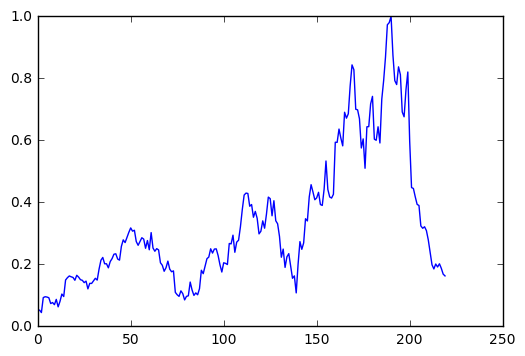

In [272]:
batch = 0 # First sequence in the batch.
signal = 0 # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

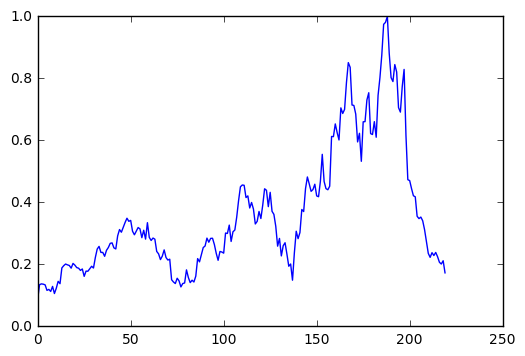

In [273]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

# Validation set

In [274]:
validation_data = (np.expand_dims(x_test_scaled, axis=0), np.expand_dims(y_test_scaled, axis=0))

# Auto-Encoder

In [275]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K


############################################################################# ???
def Auto_encoder_cost(X_input, H_Layer, X_reconstructed, W_ih, W_hr):
    ############# Hyper-parameter #############
    param_sparsity = 0.01
    Lambda = 0.0001 # param_weight_decay
    Beta = 3 # param_sparse_panelty
    ###########################################
    
    average_act_hidden = tf.reduce_mean(H_Layer,axis=0)   #Average hidden layer over all data points in X, Page 14 in https://web.stanford.edu/class/cs294a/sparseAutoencoder_2011new.pdf
    diff = X_input - X_reconstructed
    KL = Kullback_Leibler_divergence(param_sparsity, average_act_hidden)
    cost= 0.5*tf.reduce_mean(tf.reduce_sum(tf.pow(diff,2),axis=1)) + 0.5*Lambda*(tf.nn.l2_loss(W_ih) + tf.nn.l2_loss(W_hr)) + Beta*tf.reduce_sum(KL)
    return cost

def Kullback_Leibler_divergence(rho, rho_hat):
    return rho * tf.log(rho) - rho * tf.log(rho_hat) + (1 - rho) * tf.log(1 - rho) - (1 - rho) * tf.log(1 - rho_hat) 


def Single_Layer_Autoencoder(input_dim, encoding_dim=4):
    
    # this is our input placeholder
    input_encode = Input(shape=(input_dim,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='sigmoid')(input_encode)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    # this model maps an input to its reconstruction
    autoencoder = Model(input_encode, decoded)
    autoencoder_cost = Auto_encoder_cost(encoded)
    autoencoder.compile(optimizer='sgd', loss=autoencoder_cost)
    return autoencoder


def Get_layer_values(model, layer_idx):
    get_values = K.function([model.layers[0].input], [model.layers[layer_idx].output])
    return get_values([x])[0]
    
autoencoder1 = Single_Layer_Autoencoder(6, 4)
autoencoder1.fit(x_batch, x_batch, nb_epoch=20, batch_size=16)
autoencoder2 = Single_Layer_Autoencoder(4, 4)
autoencoder1_hidden = Get_layer_values(autoencoder1, 1)
autoencoder2.fit(autoencoder1_hidden, autoencoder1_hidden, nb_epoch=20, batch_size=16)
autoencoder3 = Single_Layer_Autoencoder(4, 4)
autoencoder2_hidden = Get_layer_values(autoencoder2, 1)
autoencoder3.fit(autoencoder2_hidden, autoencoder2_hidden, nb_epoch=20, batch_size=16)
autoencoder4 = Single_Layer_Autoencoder(4, 4)
autoencoder3_hidden = Get_layer_values(autoencoder3, 1)
autoencoder4.fit(autoencoder3_hidden, autoencoder3_hidden, nb_epoch=20, batch_size=16)
autoencoder4_output = Get_layer_values(autoencoder4, -1)

num_x_signals = autoencoder4_output.shape[1]

Using TensorFlow backend.


TypeError: Auto_encoder_cost() missing 4 required positional arguments: 'H_Layer', 'X_reconstructed', 'W_ih', and 'W_hr'

# Build a LSTM model

In [276]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.python.keras.optimizers import Adagrad
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [277]:
LSTM_model = Sequential()
#LSTM_model.add(LSTM(units=512, return_sequences=True, input_shape=(None, num_x_signals,)))
LSTM_model.add(LSTM(units=220, return_sequences=True, input_shape=(None, num_x_signals,)))
LSTM_model.add(Dense(num_y_signals, activation='sigmoid'))
if False:
    from tensorflow.python.keras.initializers import RandomUniform
    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)
    LSTM_model.add(Dense(num_y_signals, activation='linear', kernel_initializer=init))

## loss function

In [278]:
warmup_steps = 50
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    y_true is the desired output.
    y_pred is the model's output.
    """
    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].
    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
    
    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]
    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    #losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits) for logits, labels in zip(logits_series,labelsSeries)]
    loss = tf.losses.mean_squared_error(labels=y_true_slice, predictions=y_pred_slice)
    
    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)
    return loss_mean

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Mean Absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##indicator MAPE
print(mean_absolute_percentage_error(y_true, y_pred))
# R-squared
print(r2_score(y_true, y_pred))

# Theil_U
def Theil_U(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return(np.mean((np.square(y_true - y_pred)))/(np.sqrt(np.mean(np.square(y_true)))+np.sqrt(np.mean(np.square(y_pred)))))

NameError: name 'y_true' is not defined

## model compile

In [279]:
optimizer = Adagrad(lr=1e-3)
LSTM_model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [280]:
LSTM_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 220)         199760    
_________________________________________________________________
dense (Dense)                (None, None, 1)           221       
Total params: 199,981
Trainable params: 199,981
Non-trainable params: 0
_________________________________________________________________


In [281]:
from tensorflow.python.keras.utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(LSTM_model, to_file='LSTM_demo.png', show_shapes=True)

#from IPython.display import SVG
#from tensorflow.python.keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(LSTM_model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

## callback functions for tensorboard

In [282]:
path_checkpoint = '23_checkpoint.keras'
## Recording checkpoints
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True)
## If performance in Validation set gets worse, then stop training
callback_early_stopping = EarlyStopping(monitor='val_loss',patience=5, verbose=1)
## 
callback_tensorboard = TensorBoard(log_dir='./logs/SAE_test10',histogram_freq=0,write_graph=False)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-4,patience=0,verbose=1)
callbacks = [callback_early_stopping, callback_checkpoint, callback_tensorboard, callback_reduce_lr]

## Train the model 

In [283]:
%%time
LSTM_model.fit_generator(generator=generator, epochs=20, steps_per_epoch=100, validation_data=validation_data, callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0130
Epoch 00001: val_loss improved from inf to 0.40576, saving model to 23_checkpoint.keras
100/100 [==============================] - 36s 362ms/step - loss: 0.0129 - val_loss: 0.4058
Epoch 2/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0059
Epoch 00002: val_loss did not improve from 0.40576

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 35s 347ms/step - loss: 0.0059 - val_loss: 0.4232
Epoch 3/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0051
Epoch 00003: val_loss did not improve from 0.40576

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 34s 344ms/step - loss: 0.0051 - val_loss: 0.4245
Epoch 4/20
 99/100 [============================>.] - ETA: 0s - loss: 0.0050
Epoch 00004: val_loss did not improve from 0.40576
100/100 [==================

## Read checkpoints when early-stopping occurs

In [284]:
try:
    LSTM_model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

## Evaluation the model to the test set

In [285]:
result = LSTM_model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 29ms/step


In [286]:
print("loss (test-set):", result)

loss (test-set): 0.4057578444480896


In [287]:
# 만약 여러가지 측정치를 사용한다면 다음의 방법으로 측정할 수 있습니다.
if False:
    for res, metric in zip(result, LSTM_model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

## Visualication of prediction and real values

In [288]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    # Use the model to predict the output-signals.
    y_pred = LSTM_model.predict(x)
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]
        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

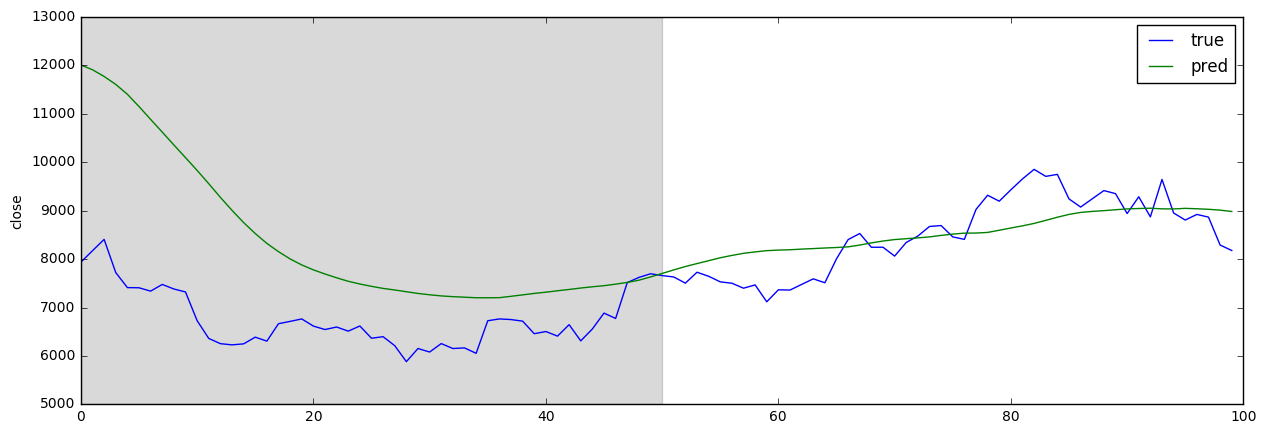

In [289]:
plot_comparison(start_idx=10, length=100, train=True)

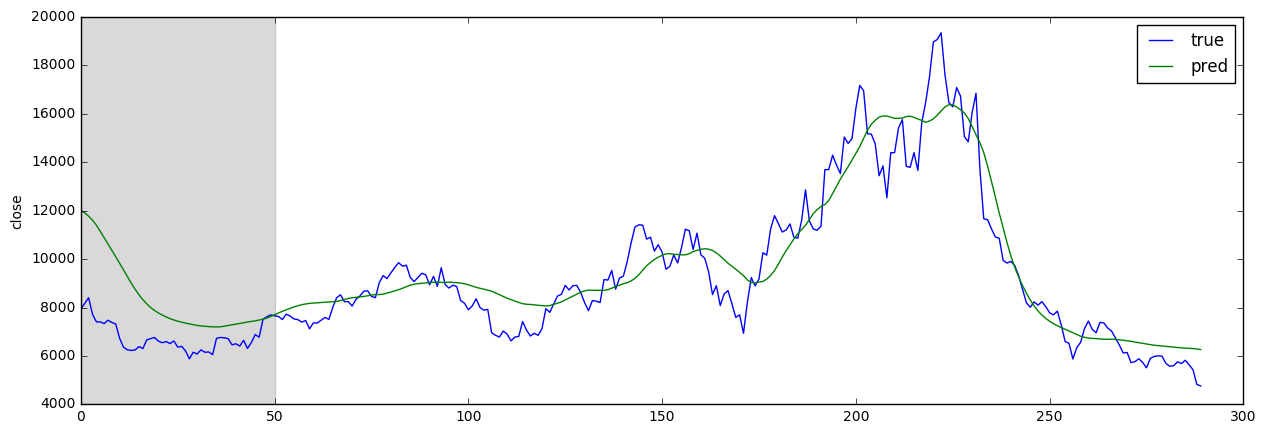

In [290]:
plot_comparison(start_idx=10, length=300, train=True)

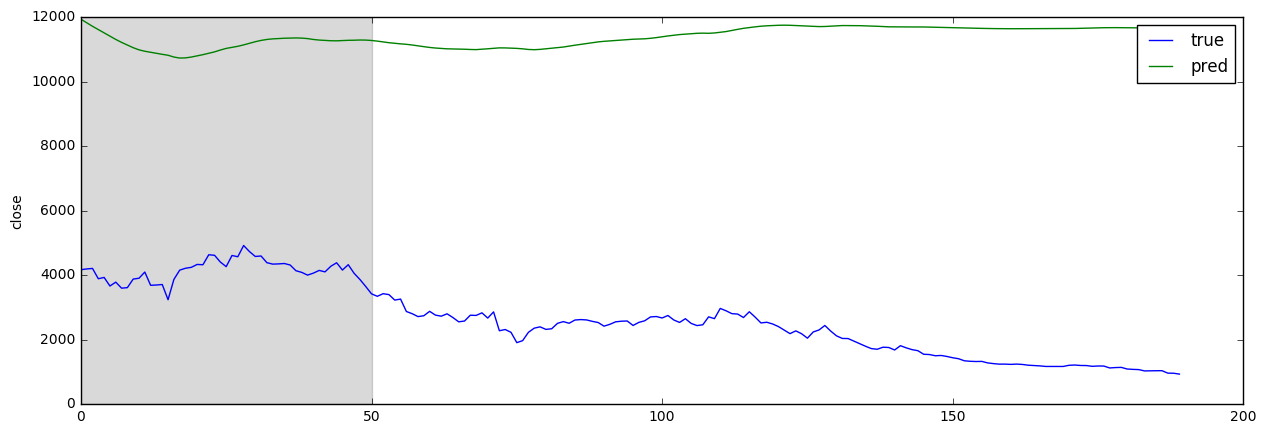

In [291]:
plot_comparison(start_idx=10, length=200, train=False)